### __Loading datasets__ ###

In [650]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [652]:
df = pd.read_csv("//Users//omarmac//Downloads//diabetes+130-us+hospitals+for+years+1999-2008//diabetic_data.csv")
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [654]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [656]:
print((df == '?').sum())


df.replace('?', pd.NA, inplace=True)

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [658]:
print(df['race'].value_counts())
print(df['gender'].value_counts())
print(df['age'].value_counts())

race
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64
age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64


In [660]:
# droping unecessary columns
df.drop(columns=['encounter_id', 'patient_nbr'], inplace=True, errors='ignore')

In [662]:
print(df.columns.tolist())

['race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [664]:
#removing duplicates
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)

0


In [666]:
#filling null places
df.drop(['weight', 'payer_code'], axis=1, inplace=True)
df['medical_specialty'].fillna('Unknown', inplace=True)
df['race'].fillna('Unknown', inplace=True)

In [668]:
# filling diagnosing colunms
for col in ['diag_1', 'diag_2', 'diag_3']:
    df[col] = df[col].fillna('Other')

In [670]:
def map_icd(code):
    try:
        code = float(code)
    except:
        return 'Other'
    
    if 390 <= code <= 459 or code == 785:
        return 'Circulatory'
    elif 460 <= code <= 519 or code == 786:
        return 'Respiratory'
    elif 520 <= code <= 579 or code == 787:
        return 'Digestive'
    elif code == 250:
        return 'Diabetes'
    elif 800 <= code <= 999:
        return 'Injury'
    elif 710 <= code <= 739:
        return 'Musculoskeletal'
    elif 140 <= code <= 239:
        return 'Neoplasms'
    else:
        return 'Other'

for col in ['diag_1', 'diag_2', 'diag_3']:
    df[col] = df[col].fillna('Other').apply(map_icd)


In [672]:
missing_pct = df['max_glu_serum'].isna().mean() * 100
print(f"Missing in max_glu_serum: {missing_pct:.2f}%")
print(df['max_glu_serum'].isnull().sum())

Missing in max_glu_serum: 94.75%
96420


In [674]:
df.drop('max_glu_serum', axis=1, inplace=True)

In [676]:
df['A1Cresult'].fillna('Missing', inplace=True)
df['A1Cresult']

0         Missing
1         Missing
2         Missing
3         Missing
4         Missing
           ...   
101761         >8
101762    Missing
101763    Missing
101764    Missing
101765    Missing
Name: A1Cresult, Length: 101766, dtype: object

In [678]:
print(df.dtypes)

race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone        

### __Outlier detection and removal__ ###

In [681]:
# percentage of outliers in each column
def count_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include='number').columns
    outlier_summary = []

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        outliers = ((df[col] < lower) | (df[col] > upper)).sum()
        outlier_pct = (outliers / df.shape[0]) * 100
        
        outlier_summary.append({
            'column': col,
            'outlier_count': outliers,
            'outlier_percent': round(outlier_pct, 2)
        })

    # Convert to DataFrame and sort by most outliers
    outlier_df = pd.DataFrame(outlier_summary)
    outlier_df = outlier_df.sort_values(by='outlier_count', ascending=False).reset_index(drop=True)

    return outlier_df

# Example usage:
outlier_report = count_outliers_iqr(df)
print(outlier_report)


                      column  outlier_count  outlier_percent
0          number_outpatient          16739            16.45
1           number_emergency          11383            11.19
2   discharge_disposition_id           9818             9.65
3           number_inpatient           7049             6.93
4        admission_source_id           6956             6.84
5             num_procedures           4954             4.87
6            num_medications           2557             2.51
7           time_in_hospital           2252             2.21
8          admission_type_id            341             0.34
9           number_diagnoses            281             0.28
10        num_lab_procedures            143             0.14


In [683]:
# Winsorization function with report
def winsorize_column_with_report(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    below_lower = (series < lower_bound).sum()
    above_upper = (series > upper_bound).sum()
    
    series_wins = np.where(series < lower_bound, lower_bound, series)
    series_wins = np.where(series_wins > upper_bound, upper_bound, series_wins)
    
    total_capped = below_lower + above_upper
    print(f"Column '{series.name}': Capped {total_capped} outliers ({below_lower} below, {above_upper} above)")
    
    return pd.Series(series_wins, index=series.index)

# Choosing columns to apply winsorization to:
selected_columns = [
    'number_outpatient',
    'number_emergency',
    'number_inpatient',
    'discharge_disposition_id',
    'admission_source_id']
# Applying
for col in selected_columns:
    df[col] = winsorize_column_with_report(df[col])

print("\n Winsorization complete for selected columns only.")

Column 'number_outpatient': Capped 16739 outliers (0 below, 16739 above)
Column 'number_emergency': Capped 11383 outliers (0 below, 11383 above)
Column 'number_inpatient': Capped 7049 outliers (0 below, 7049 above)
Column 'discharge_disposition_id': Capped 9818 outliers (0 below, 9818 above)
Column 'admission_source_id': Capped 6956 outliers (0 below, 6956 above)

 Winsorization complete for selected columns only.


## __Visualization__ ##

In [596]:
sns.set(style="whitegrid", palette='muted')
cat_palette = sns.color_palette("Set2")
box_palette = sns.color_palette("Paired")

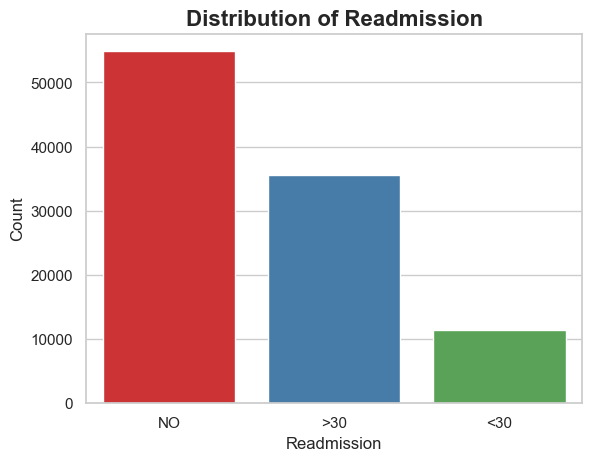

In [598]:
sns.countplot(x='readmitted', data=df, palette='Set1')
plt.title('Distribution of Readmission',fontsize=16, fontweight='bold')
plt.xlabel('Readmission', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

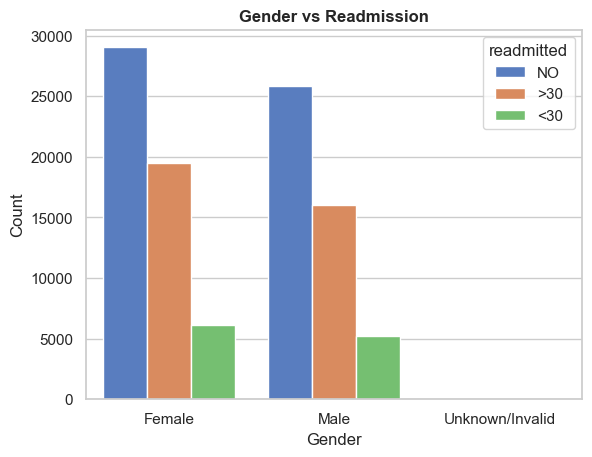

In [600]:
sns.countplot(data=df, x='gender', hue='readmitted')
plt.title('Gender vs Readmission',fontsize=12, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

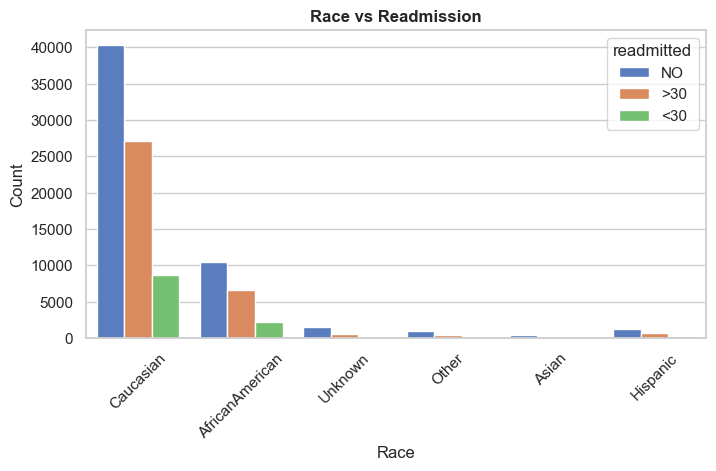

In [602]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='race', hue='readmitted')
plt.title('Race vs Readmission', fontsize=12, fontweight='bold')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

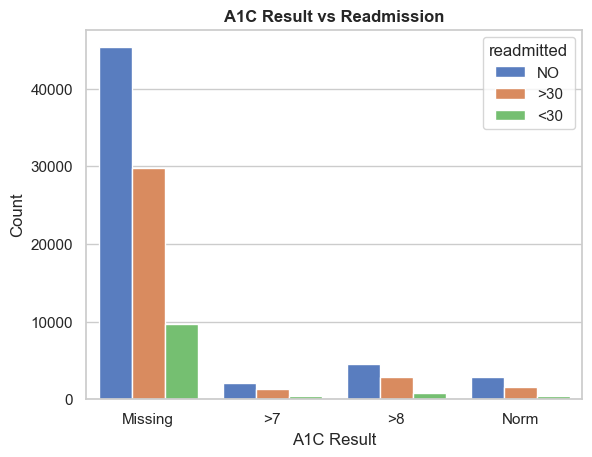

In [604]:
sns.countplot(data=df, x='A1Cresult', hue='readmitted')
plt.title('A1C Result vs Readmission',fontsize=12, fontweight='bold')
plt.xlabel('A1C Result')
plt.ylabel('Count')
plt.show()

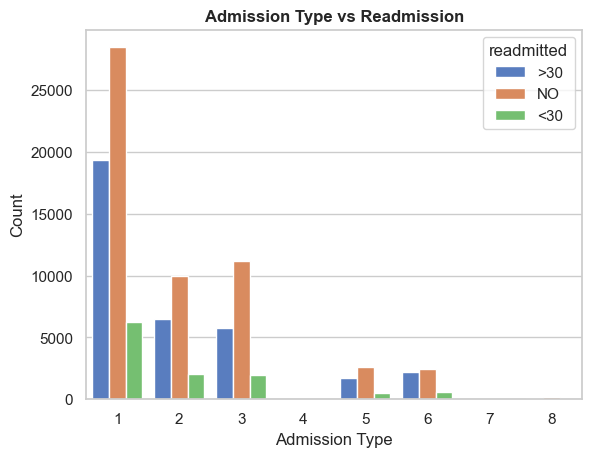

In [606]:
sns.countplot(data=df, x='admission_type_id', hue='readmitted')
plt.title('Admission Type vs Readmission',fontsize=12, fontweight='bold')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.show()

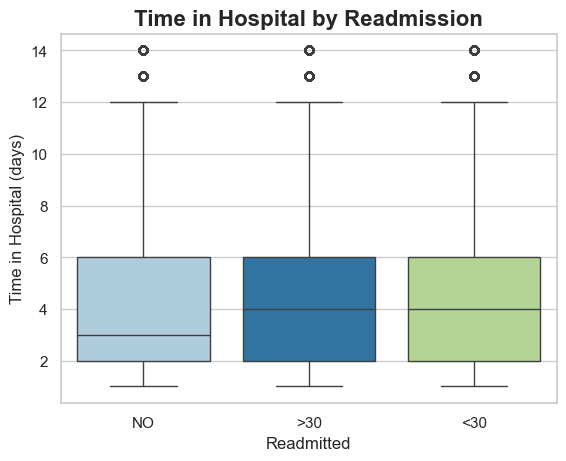

In [608]:
#Numerical features
sns.boxplot(data=df, x='readmitted', y='time_in_hospital', palette=box_palette)
plt.title('Time in Hospital by Readmission',fontsize=16, fontweight='bold')
plt.xlabel('Readmitted', fontsize=12)
plt.ylabel('Time in Hospital (days)', fontsize=12)
plt.show()

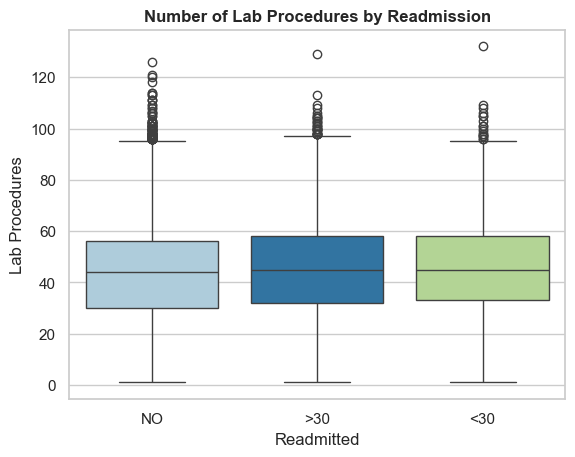

In [610]:
sns.boxplot(data=df, x='readmitted', y='num_lab_procedures', palette=box_palette)
plt.title('Number of Lab Procedures by Readmission', fontsize=12, fontweight='bold')
plt.xlabel('Readmitted', fontsize=12)
plt.ylabel('Lab Procedures', fontsize=12)
plt.show()

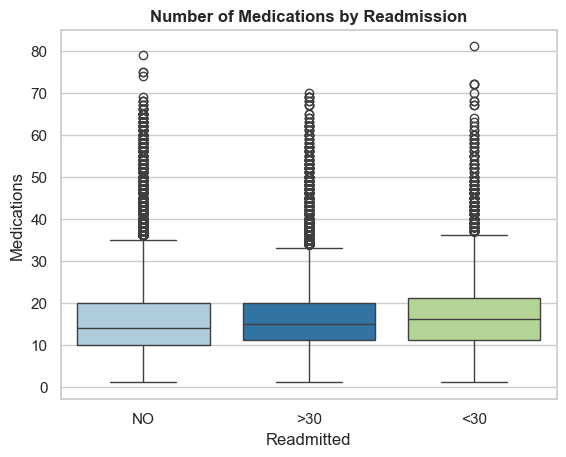

In [612]:
sns.boxplot(data=df, x='readmitted', y='num_medications', palette=box_palette)
plt.title('Number of Medications by Readmission', fontsize=12, fontweight='bold')
plt.xlabel('Readmitted', fontsize=12)
plt.ylabel('Medications', fontsize=12)
plt.show()

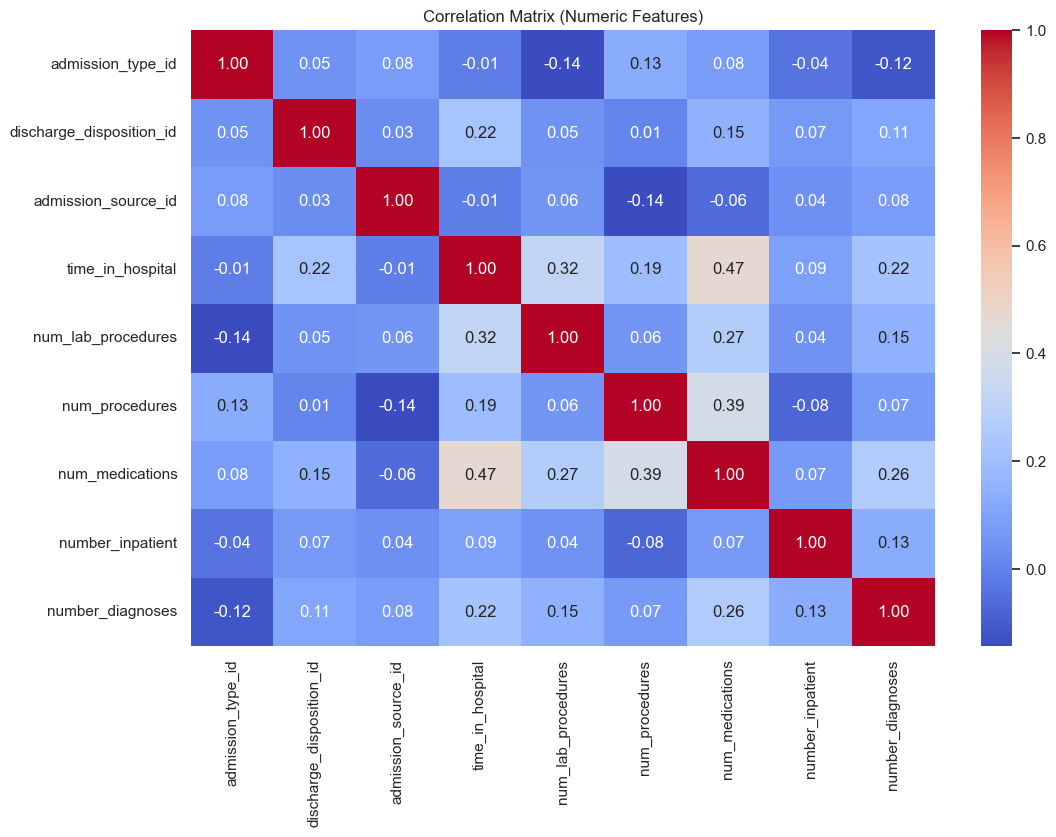

In [614]:
#heat map
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df = numeric_df.drop(columns=['number_outpatient', 'number_emergency'], errors='ignore')

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numeric Features)')
plt.show()

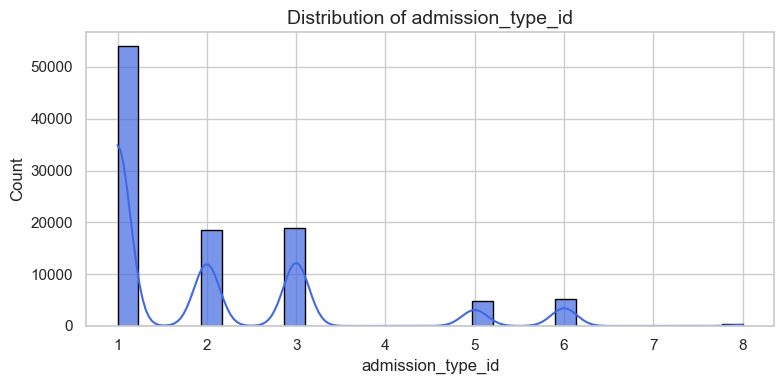

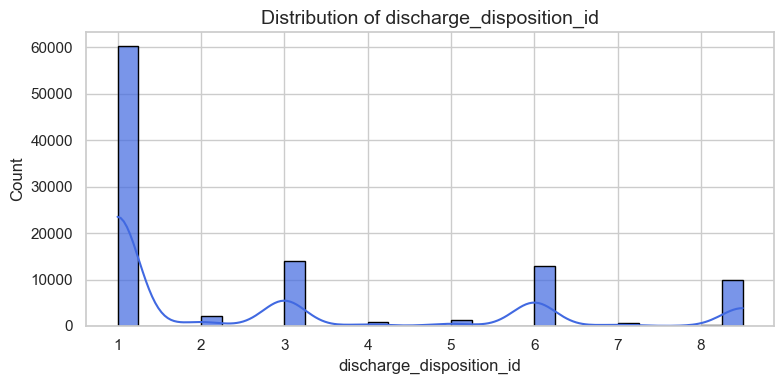

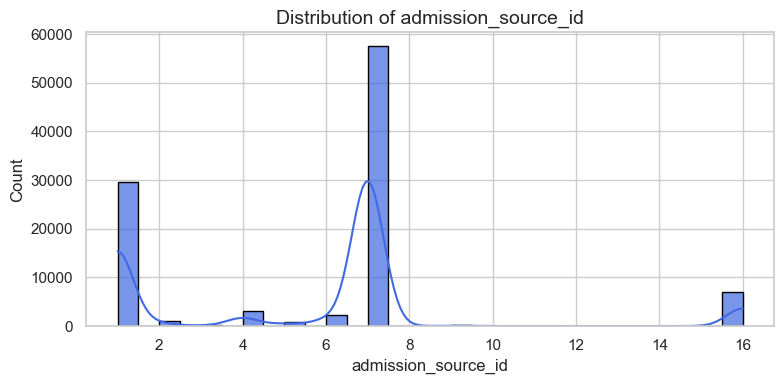

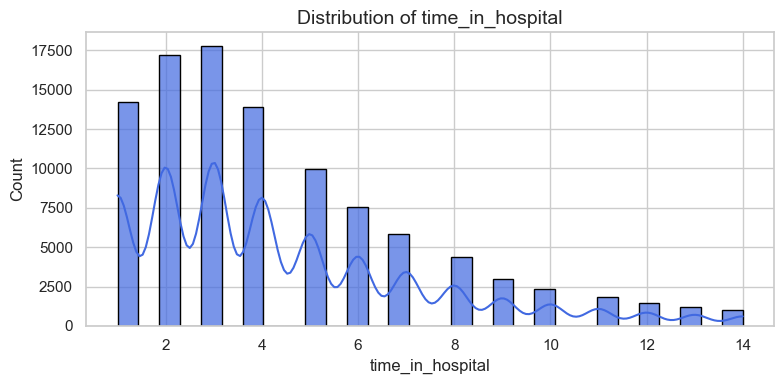

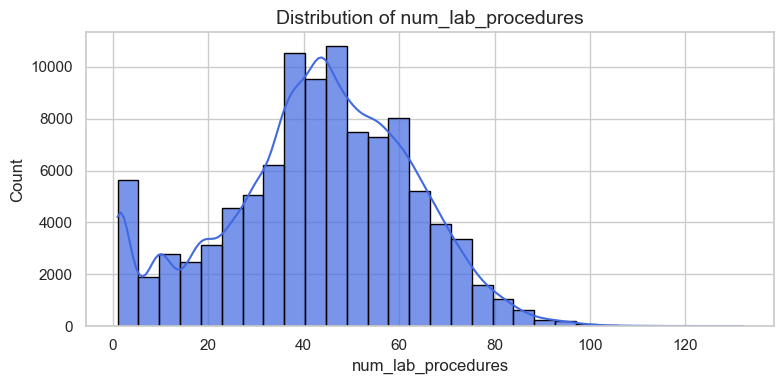

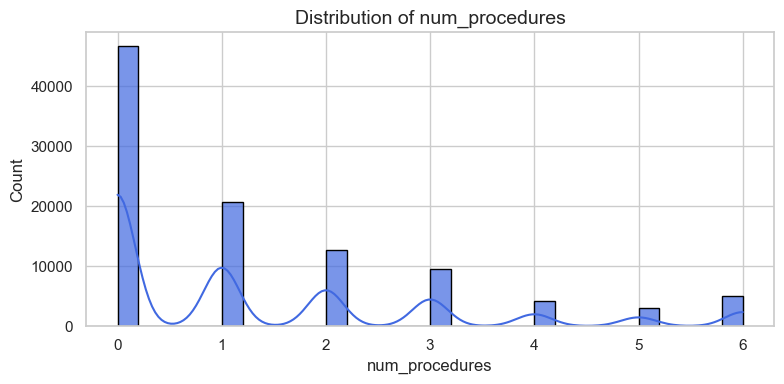

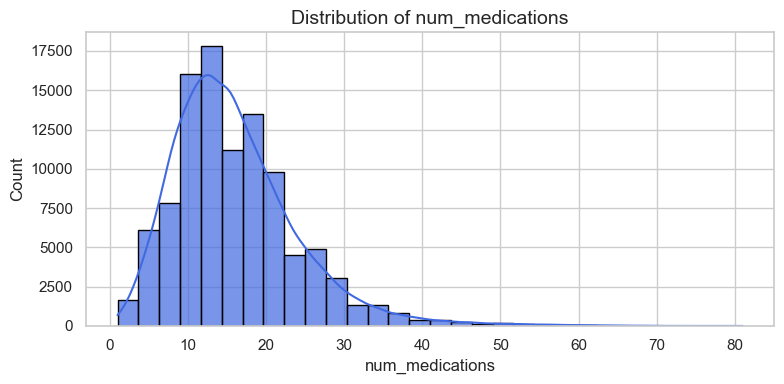

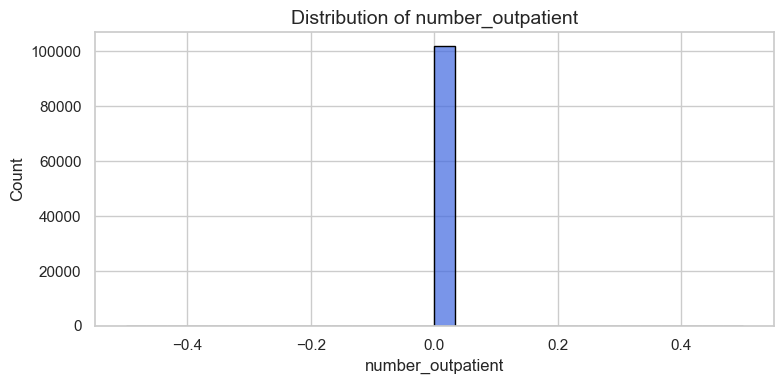

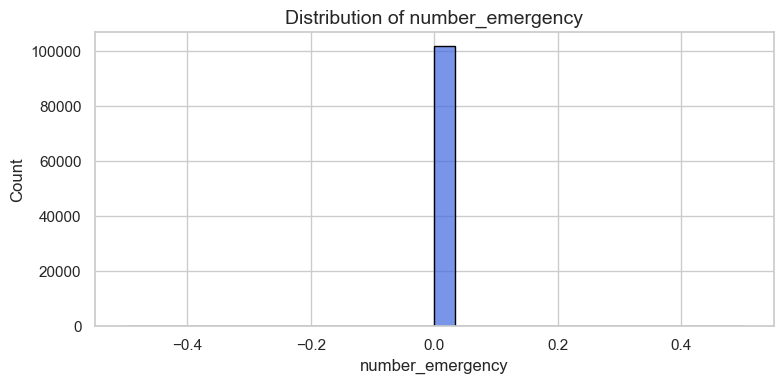

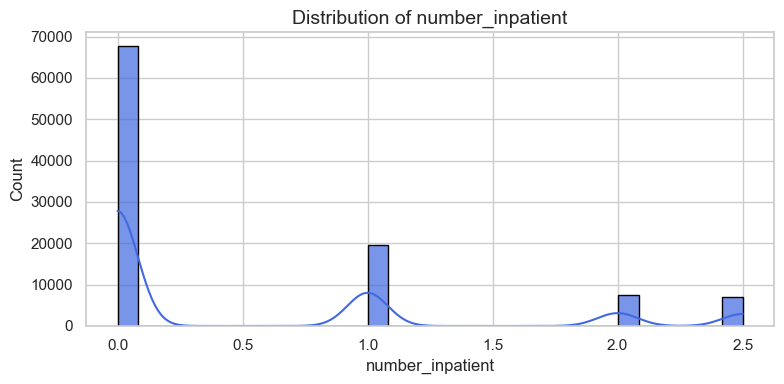

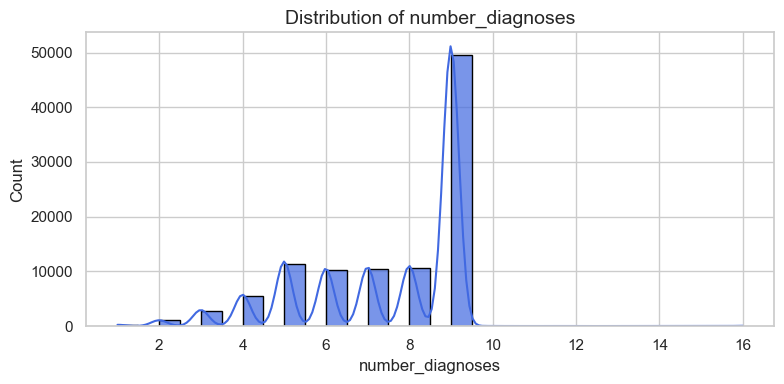

In [616]:
num_cols = df.select_dtypes(include='number').columns

#Distribution plots (Histogram + KDE)
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, alpha=0.7, color='royalblue', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


## __Model Building__ ##

### 🎯__final method__ ###

In [685]:
#scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [687]:
df['readmitted'] = df['readmitted'].replace({'NO': 0, '>30': 1, '<30': 1})

In [689]:
#Encoding
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [627]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Columns: 174 entries, admission_type_id to diabetesMed_Yes
dtypes: float64(11), int64(163)
memory usage: 135.1 MB


In [629]:
df

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
0,2.750800,2.236044,-1.212565,-1.137649,-0.106517,-0.785398,-1.848268,0.0,0.0,-0.633137,...,0,1,0,0,0,0,0,0,1,0
1,-0.708461,-0.689362,0.341809,-0.467653,0.808384,-0.785398,0.243390,0.0,0.0,-0.633137,...,1,1,0,0,0,0,0,0,0,1
2,-0.708461,-0.689362,0.341809,-0.802651,-1.631351,2.145781,-0.371804,0.0,0.0,0.599406,...,0,1,0,0,0,0,0,0,1,1
3,-0.708461,-0.689362,0.341809,-0.802651,0.045967,-0.199162,-0.002688,0.0,0.0,-0.633137,...,1,1,0,0,0,0,0,0,0,1
4,-0.708461,-0.689362,0.341809,-1.137649,0.401761,-0.785398,-0.986997,0.0,0.0,-0.633137,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,-0.708461,0.090747,0.341809,-0.467653,0.401761,-0.785398,-0.002688,0.0,0.0,-0.633137,...,0,1,0,0,0,0,0,0,0,1
101762,-0.708461,0.480801,-0.176315,0.202343,-0.513139,0.973309,0.243390,0.0,0.0,0.599406,...,0,1,0,0,0,0,0,0,1,1
101763,-0.708461,-0.689362,0.341809,-1.137649,0.503417,-0.785398,-0.863958,0.0,0.0,-0.633137,...,0,1,0,0,0,0,0,0,0,1
101764,-0.016609,0.090747,0.341809,1.877333,0.096794,0.387074,0.612506,0.0,0.0,0.599406,...,1,1,0,0,0,0,0,0,0,1


In [691]:
from sklearn.model_selection import train_test_split

#features and target
X = df.drop('readmitted', axis=1)
y = df['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [693]:
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

X_train shape: (81412, 173), X_test shape: (20354, 173)


In [635]:
#importing all necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score


Training Logistic Regression...

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.62      0.77      0.69     10973
           1       0.63      0.45      0.52      9381

    accuracy                           0.62     20354
   macro avg       0.62      0.61      0.61     20354
weighted avg       0.62      0.62      0.61     20354

Accuracy: 0.62278
ROC AUC Score: 0.6570


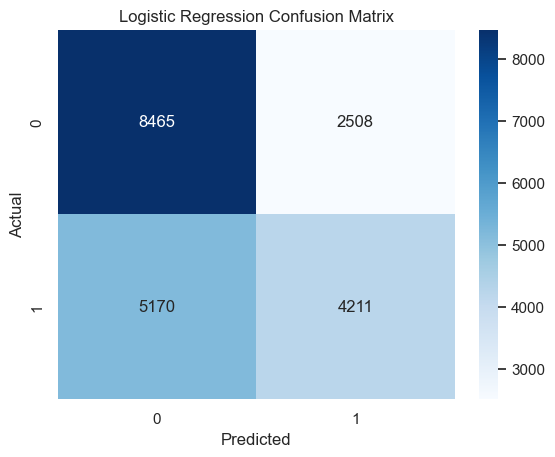


Training Random Forest...

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.64      0.74      0.69     10973
           1       0.63      0.50      0.56      9381

    accuracy                           0.63     20354
   macro avg       0.63      0.62      0.62     20354
weighted avg       0.63      0.63      0.63     20354

Accuracy: 0.63255
ROC AUC Score: 0.6771


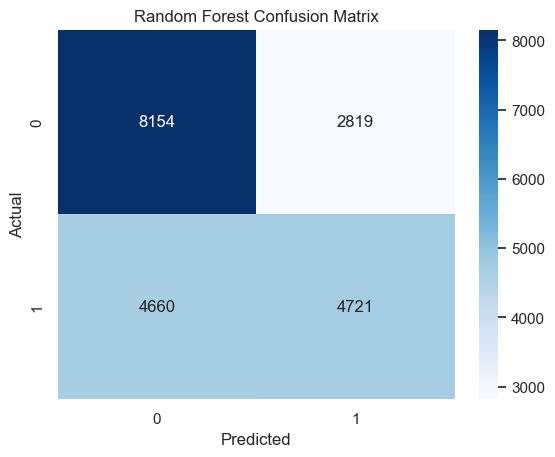


Training Linear SVM...

Linear SVM Performance:
              precision    recall  f1-score   support

           0       0.62      0.77      0.69     10973
           1       0.63      0.45      0.52      9381

    accuracy                           0.62     20354
   macro avg       0.62      0.61      0.61     20354
weighted avg       0.62      0.62      0.61     20354

Accuracy: 0.62297
ROC AUC Score: 0.6571


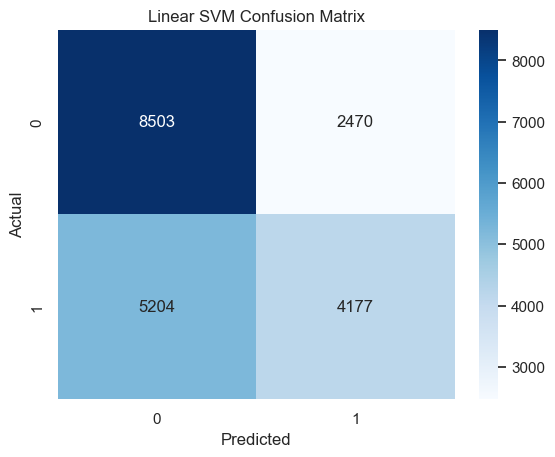


Training XGBoost...

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.65      0.72      0.68     10973
           1       0.62      0.54      0.58      9381

    accuracy                           0.64     20354
   macro avg       0.64      0.63      0.63     20354
weighted avg       0.64      0.64      0.63     20354

Accuracy: 0.63761
ROC AUC Score: 0.6876


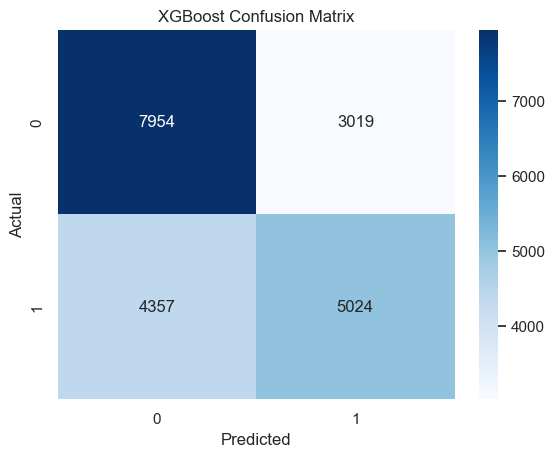

In [637]:
# model training and evaluation
X_train.columns = X_train.columns.str.replace(r'[\[\]<>]', '', regex=True)
X_test.columns = X_test.columns.str.replace(r'[\[\]<>]', '', regex=True)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_jobs=-1),
    'Linear SVM': CalibratedClassifierCV(LinearSVC(max_iter=1000)),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Use predict_proba if available
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
    except AttributeError:
        y_prob = model.decision_function(X_test)
        
    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.5f}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

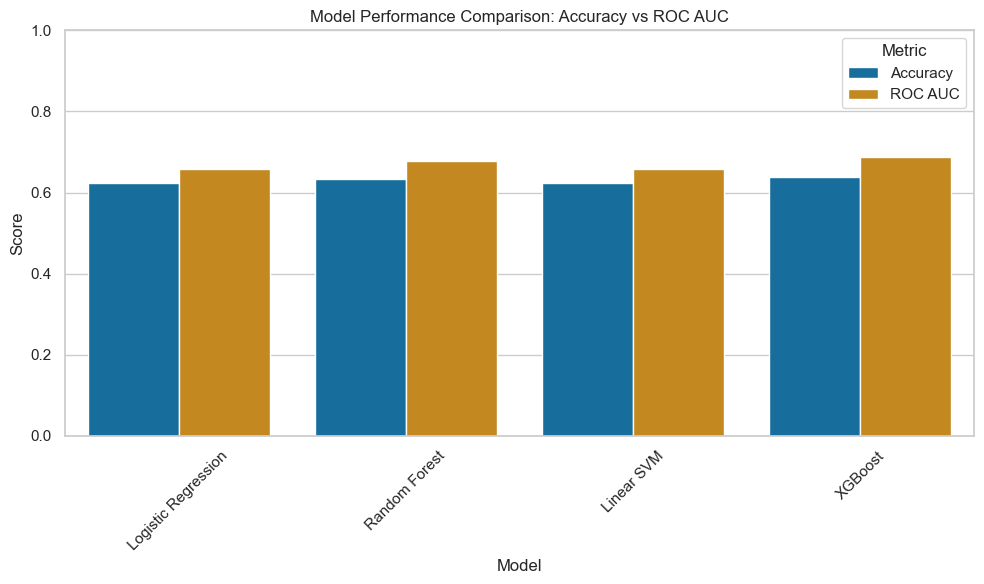

In [639]:
# Summary
model_scores = [
    {'Model': 'Logistic Regression', 'Accuracy': 0.62278, 'ROC AUC': 0.6570},
    {'Model': 'Random Forest',       'Accuracy': 0.63255, 'ROC AUC': 0.6771},
    {'Model': 'Linear SVM',          'Accuracy': 0.62297, 'ROC AUC': 0.6571},
    {'Model': 'XGBoost',             'Accuracy': 0.63761, 'ROC AUC': 0.6876}
]

df_scores = pd.DataFrame(model_scores)

# Melt for grouped bar plot
df_melted = df_scores.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette='colorblind')
plt.title('Model Performance Comparison: Accuracy vs ROC AUC')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [641]:
print(df['readmitted'].value_counts())


readmitted
0    54864
1    46902
Name: count, dtype: int64


### __Xgboost_training_separately__ ###

In [382]:
from xgboost import XGBClassifier
import pandas as pd

X_train.columns = X_train.columns.str.replace(r'[\[\]<>]', '', regex=True)
X_test.columns = X_test.columns.str.replace(r'[\[\]<>]', '', regex=True)

# Train XGBoost on full feature set
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Get feature importances
importances = xgb_model.feature_importances_
features = X_train.columns

# Create a dataframe and sort by importance
feat_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)

# View top 50 features (change this number if needed)
top_n = 50
top_features = feat_importance['Feature'].head(top_n).tolist()

print("Top Features Selected:\n", top_features)


Top Features Selected:
 ['number_inpatient', 'race_Unknown', 'medical_specialty_ObstetricsandGynecology', 'diabetesMed_Yes', 'admission_source_id', 'diag_1_Neoplasms', 'discharge_disposition_id', 'medical_specialty_Orthopedics-Reconstructive', 'number_diagnoses', 'age_80-90)', 'medical_specialty_Nephrology', 'diag_2_Diabetes', 'medical_specialty_Surgery-Cardiovascular/Thoracic', 'diag_2_Injury', 'age_90-100)', 'medical_specialty_InternalMedicine', 'race_Hispanic', 'repaglinide_Steady', 'age_70-80)', 'glyburide-metformin_Steady', 'admission_type_id', 'diag_2_Neoplasms', 'diag_3_Neoplasms', 'A1Cresult_Norm', 'medical_specialty_Unknown', 'diag_1_Respiratory', 'medical_specialty_Emergency/Trauma', 'diag_1_Injury', 'insulin_Steady', 'age_30-40)', 'age_20-30)', 'medical_specialty_Radiology', 'medical_specialty_Surgery-Neuro', 'medical_specialty_Orthopedics', 'medical_specialty_Surgery-Vascular', 'metformin_No', 'diag_1_Musculoskeletal', 'glimepiride_Steady', 'acarbose_No', 'glipizide_Steady'

In [384]:
# Subset the original data
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]


In [386]:
# Re-train example with XGBoost
xgb_model_top = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model_top.fit(X_train_top, y_train)

# Evaluate
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

y_pred = xgb_model_top.predict(X_test_top)
y_proba = xgb_model_top.predict_proba(X_test_top)[:, 1]

print("XGBoost with Top Features:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


XGBoost with Top Features:
              precision    recall  f1-score   support

           0       0.64      0.73      0.68     10973
           1       0.62      0.52      0.57      9381

    accuracy                           0.63     20354
   macro avg       0.63      0.62      0.62     20354
weighted avg       0.63      0.63      0.63     20354

Accuracy: 0.6320133634666405
ROC AUC Score: 0.6774365727359806


In [391]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'scale_pos_weight': [1]  # Optional: adjust if imbalance becomes a concern again
}

# Initialize model
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42
)


# Grid search with 3-fold CV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           scoring='roc_auc', cv=3, n_jobs=-1, verbose=2)

# Fit on top-selected features
grid_search.fit(X_train_top, y_train)

# Best params and score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC Score:", grid_search.best_score_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 0.8}
Best ROC AUC Score: 0.6827143426820405


### __Few more hyper parameter tuning__ ###

In [644]:
# score didnt enhanced

Fitting 3 folds for each of 12 candidates, totalling 36 fits
🔍 Best XGBoost Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 0.8}

XGBoost Performance:
               precision    recall  f1-score   support

           0       0.64      0.75      0.69     10973
           1       0.64      0.52      0.57      9381

    accuracy                           0.64     20354
   macro avg       0.64      0.63      0.63     20354
weighted avg       0.64      0.64      0.64     20354

Accuracy: 0.6418885722708068
ROC AUC: 0.6329296484370117

Random Forest Performance:
               precision    recall  f1-score   support

           0       0.64      0.74      0.68     10973
           1       0.62      0.51      0.56      9381

    accuracy                           0.63     20354
   macro avg       0.63      0.62      0.62     20354
weighted avg       0.63      0.63      0.63     20354

Accuracy: 0.63255379777

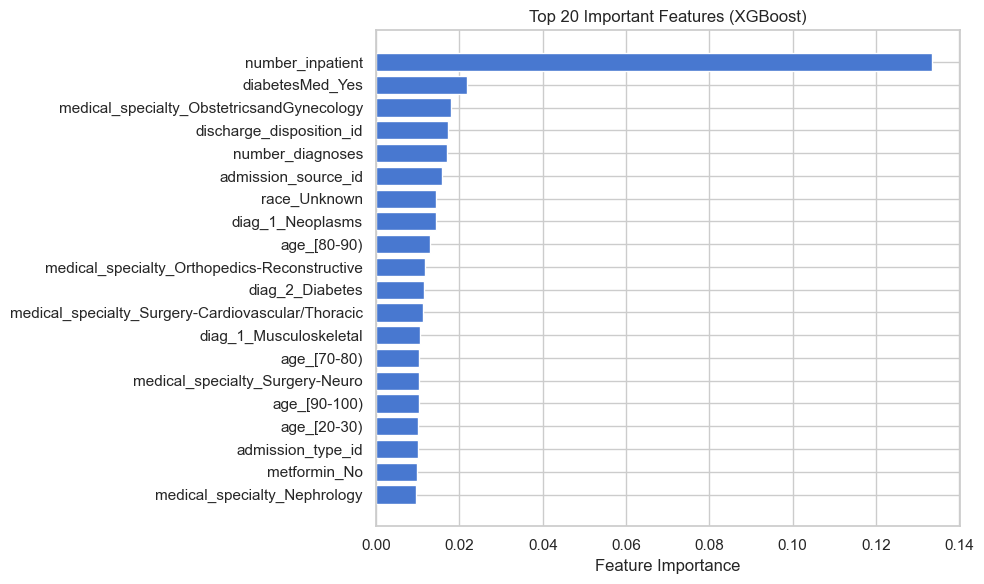

In [697]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

X_train.columns = X_train.columns.str.replace(r'[\[\]<>]', '', regex=True)
X_test.columns = X_test.columns.str.replace(r'[\[\]<>]', '', regex=True)

# --- XGBoost with Hyperparameter Tuning ---
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'scale_pos_weight': [1]  
}
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_xgb.fit(X_train, y_train)

print("🔍 Best XGBoost Parameters:", grid_xgb.best_params_)

# Evaluation
y_pred_xgb = grid_xgb.predict(X_test)
print("\nXGBoost Performance:\n", classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_pred_xgb))

# --- Random Forest Model ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Performance:\n", classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_pred_rf))

# --- Feature Importance Plot (XGBoost) ---
importances = grid_xgb.best_estimator_.feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Top 20 Important Features (XGBoost)')
plt.tight_layout()
plt.show()


In [439]:
importances = xgb_model.feature_importances_
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)
print(feat_imp_df.head(20))


                                               Feature  Importance
9                                     number_inpatient    0.130043
15                                        race_Unknown    0.018664
50           medical_specialty_ObstetricsandGynecology    0.018486
172                                    diabetesMed_Yes    0.017015
2                                  admission_source_id    0.016702
103                                   diag_1_Neoplasms    0.016504
1                             discharge_disposition_id    0.016319
54        medical_specialty_Orthopedics-Reconstructive    0.014498
10                                    number_diagnoses    0.013956
25                                          age_80-90)    0.013728
45                        medical_specialty_Nephrology    0.012214
106                                    diag_2_Diabetes    0.011829
86   medical_specialty_Surgery-Cardiovascular/Thoracic    0.011709
108                                      diag_2_Injury    0.01

## __KNN__ ##

In [ ]:
# used multi classfication for KNN
# not so good score using KNN

In [550]:
#scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [552]:
df['readmitted'] = df['readmitted'].replace({'NO': 0, '<30': 1, '>30': 2})

In [554]:
#Encoding
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [556]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize

# ---- 2. Train-Test Split ----
X = df.drop('readmitted', axis=1)
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.columns = X_train.columns.str.replace(r'[\[\]<>]', '', regex=True)
X_test.columns = X_test.columns.str.replace(r'[\[\]<>]', '', regex=True)


# ---- 3. PCA + KNN Pipeline ----
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95, random_state=42)),  # retain 95% variance
    ('knn', KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree', n_jobs=-1))
])

# ---- 4. Train Model ----
pipeline.fit(X_train, y_train)

# ---- 5. Predict & Evaluate ----
y_pred = pipeline.predict(X_test)

print("\n🔍 Classification Report (Multiclass):")
print(classification_report(y_test, y_pred))

print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.5f}")

# ---- 6. ROC AUC (One-vs-Rest) ----
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = pipeline.predict_proba(X_test)

roc_auc = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
print(f"🎯 Multiclass ROC AUC (OvR): {roc_auc:.5f}")



🔍 Classification Report (Multiclass):
              precision    recall  f1-score   support

           0       0.57      0.75      0.65     10973
           1       0.15      0.06      0.09      2272
           2       0.39      0.28      0.33      7109

    accuracy                           0.51     20354
   macro avg       0.37      0.36      0.35     20354
weighted avg       0.46      0.51      0.47     20354

✅ Accuracy: 0.50732
🎯 Multiclass ROC AUC (OvR): 0.55333


## __Summary__ ##

In [ ]:
-- best model over all --

#### • Final model labelled as :🎯
#### • Best overall model ✅ XGBoost
#### • Highest Accuracy: (0.63761)
#### • ROC AUC Score: (0.6876)🎯
#### • XGBoost trained separately still even with
####  -feature importance only slight improvement in roc.
#### • KNN shown poor prediction